In [12]:
from scipy.optimize import minimize
import math
from random import *
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

In [13]:
def objective(z):
    p = 0
    #real students to fake students/boundary
    r = 4
    fakeStudents = 0
    fstudents = []
    for i in range(0,class_x-chair_l+1,2):
        fstudents.append(i)
        fstudents.append(-r)
        fstudents.append(i)
        fstudents.append(class_y-chair_l+r)
        fakeStudents = fakeStudents + 2
    for i in range(0,class_y-chair_l+1,2):
        fstudents.append(-r)
        fstudents.append(i)
        fstudents.append(class_x-chair_l+r)
        fstudents.append(i)
        fakeStudents = fakeStudents + 2
    for i in range(1,r):
        fstudents.append(class_x-chair_l+i)
        fstudents.append(-r+i)
        fstudents.append(class_x-chair_l+r-i)
        fstudents.append(class_y-chair_l+i)
        fstudents.append(-i)
        fstudents.append(class_y-chair_l+r-i)
        fstudents.append(-r+i)
        fstudents.append(-i)
        fakeStudents = fakeStudents + 4
        
    #start p computations
    for i in range(int(len(z)/3)):
        #real to fake students
        for j in range(int(len(fstudents)/2)):
            x1 = z[i*3]
            y1 = z[i*3+1]
            d1 = z[i*3+2]
            x2 = fstudents[j*2]
            y2 = fstudents[j*2+1]
            
            x = (x2-x1)*math.cos(d1)-(y2-y1)*math.sin(d1)
            y = (x2-x1)*math.sin(d1)+(y2-y1)*math.cos(d1)

            p = p + 8*2**(-.3*(x**2+y**2)) +5*2**(-.15*((x-2)**2+(y-2)**2))
            p = p + 3*2**(-.1*((x-5)**2+(y-5)**2))
            
        #real to real students    
        for j in range(int(len(z)/3)):
            if i != j:
                #equation
                x1 = z[i*3]
                y1 = z[i*3+1]
                d1 = z[i*3+2] 
                x2 = z[j*3]
                y2 = z[j*3+1]
                
                #depends on angle of first student
                x = (x2-x1)*math.cos(d1)-(y2-y1)*math.sin(d1)
                y = (x2-x1)*math.sin(d1)+(y2-y1)*math.cos(d1)
                
                p = p + 8*2**(-.4*(x**2+y**2)) +5*2**(-.15*((x-2)**2+(y-2)**2))
                p = p + 3*2**(-.1*((x-5)**2+(y-5)**2))
    return p

def roundAngle(num):
    n = (num-math.pi/4)/(2*math.pi)
    n = n*8
    n = round(n)%8
    n = int(n*45)
    return n

#functions
def addTable():
    #find highest position number in table_placeent_ns
    max_ns = 0
    for i in range(class_y-(table[1]-1)):
        for j in range(class_x-(table[0]-1)):
            if table_placement_ns[i][j] > max_ns:
                max_ns = table_placement_ns[i][j]
    #find highest position number in table_placeent_ew
    max_ew = 0
    for i in range(class_y-(table[0]-1)):
        for j in range(class_x-(table[1]-1)):
            if table_placement_ew[i][j] > max_ew:
                max_ew = table_placement_ew[i][j]
    
    #compare the highest position number in ns and ew
    if (max_ns >= max_ew):
        t = table_placement_ns
        table_x = table[0]
        table_y = table[1]
        m = max_ns
        ns_table = 1
    else:
        t = table_placement_ew
        table_x = table[1]
        table_y = table[0]
        m = max_ew
        ns_table = 0
    
    #count how many available positions there are for the specific table orientation
    available = sum(x.count(m) for x in t)
    
    #rng for which position
    num = math.ceil(random()*available)
    #put at that position
    for i in range(class_y-(table_y-1)):
        for j in range(class_x-(table_x-1)):
            if t[i][j] == m:
                num -= 1
            if num == 0:
                x = j
                y = i
                break
        if num == 0:
            break
            
    #update classroom
    for i in range(y, y+table_y):
        for j in range(x,x+table_x):
            classroom[i][j] = 1
    
    #update table_placement_ns
    for i in range(y-(table[1]-1), y+table[ns_table]):
        for j in range(x-(table[0]-1), x+table[1-ns_table]):
            if i >= 0 and i < class_y and j >= 0 and j < class_x:
                table_placement_ns[i][j] = 0
    
    #update table_placement_ew
    for i in range(y-(table[0]-1), y+table[ns_table]):
        for j in range(x-(table[1]-1), x+table[1-ns_table]):
            if i >= 0 and i < class_y and j >= 0 and j < class_x:
                table_placement_ew[i][j] = 0
    
    #add table
    tables.append([x, y, ns_table])
    
def addChair(x,y,d):
    available = sum(x1.count(1) for x1 in chair_placement)
    if available <= 0:
        return -1
    
    #update classroom
    #print(chair_l)
    for i in range(y, y+chair_l):
        for j in range(x,x+chair_l):
            classroom[i][j] = 2
            
    #update table_placement_ns
    for i in range(y-table[1], y+chair_l+1):
        for j in range(x-table[0], x+chair_l+1):
            if i >= 0 and i < class_y and j >= 0 and j < class_x and table_placement_ns[i][j]!=0:
                if i >= y-(table[1]-1) and i < y+chair_l and j >= x-(table[0]-1) and j < x+chair_l:
                    table_placement_ns[i][j] = 0
                else:
                    if j == x+chair_l and i > y-table[1] and i < y+chair_l and(d>=315 or d<=45):
                        table_placement_ns[i][j] = table_placement_ns[i][j] + 1
                    if i == y-table[1] and j > x-table[0] and j < x+chair_l and d>=45 and d<=135:
                        table_placement_ns[i][j] = table_placement_ns[i][j] + 1
                    if j == x-table[0] and i > y-table[1] and i < y+chair_l and d>=135 and d<=225:
                        table_placement_ns[i][j] = table_placement_ns[i][j] + 1
                    if i == y+chair_l and j > x-table[0] and j < x+chair_l and d>=225 and d<=315:
                        table_placement_ns[i][j] = table_placement_ns[i][j] + 1
                    
    #update table_placement_ew
    for i in range(y-table[0], y+chair_l+1):
        for j in range(x-table[1], x+chair_l+1):
            if i >= 0 and i < class_y and j >= 0 and j < class_x and table_placement_ew[i][j]!=0:
                if  i >= y-(table[0]-1) and i < y+chair_l and j >= x-(table[1]-1) and j < x+chair_l:
                    table_placement_ew[i][j] = 0
                else:
                    if j == x+chair_l and i > y-table[0] and i < y+chair_l and(d>=315 or d<=45):
                        table_placement_ew[i][j] = table_placement_ew[i][j] + 1
                    if i == y-table[0] and j > x-table[1] and j < x+chair_l and d>=45 and d<=135:
                        table_placement_ew[i][j] = table_placement_ew[i][j] + 1
                    if j == x-table[1] and i > y-table[0] and i < y+chair_l and d>=135 and d<=225:
                        table_placement_ew[i][j] = table_placement_ew[i][j] + 1
                    if i == y+chair_l and j > x-table[1] and j < x+chair_l and d>=225 and d<=315:
                        table_placement_ew[i][j] = table_placement_ew[i][j] + 1
    
    #change this
    #update chair_placement
    for i in range(class_y):
        for j in range(class_x):
            if math.sqrt((i-y)**2 + (j-x)**2) < 6:
                chair_placement[i][j] = 0
    
    #add chair
    chairs.append([x,y,d])

In [14]:
students = 1
class_y = 20
class_x = 10
chair_l = 2 #make sure 0 index is smaller than 1 index
#set input
table_long = 6
table_short = 2
table_num = 1
table = [int(table_short),int(table_long)]

#set up arrays
tables = []
chairs = []
classroom = [[0 for i in range(class_x)] for j in range(class_y)]
chair_placement = [[1 for i in range(class_x)] for j in range(class_y)]
#hard code for seat length = 2
for i in range(class_y):
    chair_placement[i][class_x-1] = 0       
for j in range(class_x):
    chair_placement[class_y-1][j] = 0  
table_placement_ns = [[1 for i in range(class_x)] for j in range(class_y)]
table_placement_ew = [[1 for i in range(class_x)] for j in range(class_y)]
for i in range(class_y):
    for j in range(class_x):
        if j >= class_x-(table_long-1) or i >= class_y-(table_short-1):
            table_placement_ew[i][j] = 0
for i in range(class_y):
    for j in range(class_x):
        if j >= class_x-(table_short-1) or i >= class_y-(table_long-1):
            table_placement_ns[i][j] = 0

In [15]:
#actual bounds
bnds = ()
x_bnd = (0,class_x-2)
y_bnd = (0,class_y-2)
d_bnd = (0,4*math.pi)
for i in range(students):
    bnds = bnds + (x_bnd,y_bnd,d_bnd)

#guess
guess = []
for i in range(students):
    guess.append(random()*class_x)
    guess.append(random()*class_y)
    guess.append(2*math.pi)
print(objective(guess))

#con1 = {'type': 'ineq','fun': constraint1}
cons = []

20.01882568889812


In [16]:
sol = minimize(objective,guess,method='SLSQP',\
                bounds=bnds,constraints=cons)

In [17]:
#adding chairs        
for i in range(students):
    if (addChair(int(round(sol.x[i*3])),int(round(sol.x[i*3+1])),roundAngle(sol.x[i*3+2])) == -1):
        print("Not enough space!")

print(sol)

     fun: 0.950096912785427
     jac: array([-2.78726220e-05, -5.84423542e-05,  2.23092128e+00])
 message: 'Optimization terminated successfully'
    nfev: 56
     nit: 14
    njev: 14
  status: 0
 success: True
       x: array([6.51504374e-01, 4.77349783e+00, 3.52301802e-13])


In [18]:
for i in range(int(len(sol.x)/3)):
    print(sol.x[i*3:(i+1)*3], end = " ")
    print(roundAngle(sol.x[i*3+2]))

[6.51504374e-01 4.77349783e+00 3.52301802e-13] 315


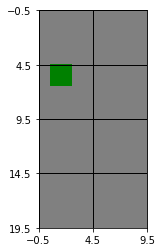

[1, 5, 315]


In [19]:
# create discrete colormap
cmap = colors.ListedColormap(['grey','blue','green'])
bounds = [0,1,2,3]
norm = colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots()
ax.imshow(classroom, cmap=cmap, norm=norm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=1)
ax.set_xticks(np.arange(-.5, class_x, 5))
ax.set_yticks(np.arange(-.5, class_y, 5))

plt.show()
for chair in chairs:
    print(chair)

In [20]:
#Debug
#for i in range(class_y):
#    print(classroom[i], end = "\n")
#print("\n")
for i in range(class_y):
    print(table_placement_ns[i], end = "\n")
print("\n")
for i in range(class_y):
    print(table_placement_ew[i], end = "\n")
print("\n")
#for i in range(class_y):
#    print(chair_placement[i], end = "\n")

[0, 0, 0, 2, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 2, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 2, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 2, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 2, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 2, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 2, 1, 1, 1, 1, 1, 0]
[2, 2, 2, 1, 1, 1, 1, 1, 1, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


[1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 2, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 2, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 2, 1, 0, 0, 0, 0, 0]
[2, 2, 2, 1, 1, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
[1, 1,

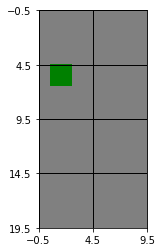

In [21]:
#for i in range(table_num):
#    if (addTable() == -1):
#        print("Not enough space!")
        
# create discrete colormap
cmap = colors.ListedColormap(['grey','blue','green'])
bounds = [0,1,2,3]
norm = colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots()
ax.imshow(classroom, cmap=cmap, norm=norm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=1)
ax.set_xticks(np.arange(-.5, class_x, 5))
ax.set_yticks(np.arange(-.5, class_y, 5))

plt.show()

In [23]:
#Debug
#for i in range(class_y):
#    print(classroom[i], end = "\n")
#print("\n")
for i in range(class_y):
    print(table_placement_ns[i], end = "\n")
print("\n")
for i in range(class_y):
    print(table_placement_ew[i], end = "\n")
print("\n")
for i in range(class_y):
    print(chair_placement[i], end = "\n")

[0, 0, 0, 2, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 2, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 2, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 2, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 2, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 2, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 2, 1, 1, 1, 1, 1, 0]
[2, 2, 2, 1, 1, 1, 1, 1, 1, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


[1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 2, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 2, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 2, 1, 0, 0, 0, 0, 0]
[2, 2, 2, 1, 1, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
[1, 1,